In [1]:
import sqlite3
import pandas as pd
import numpy as np

In [2]:
con = sqlite3.connect('karelia_database_project.db')  # подключение
cur = con.cursor()
from sqlite3 import connect
conn = connect(':memory:')

In [3]:
utterances_query = """
SELECT * FROM utterances
"""

In [4]:
df = pd.read_sql(utterances_query, con)
df

,utterance_id,speaker_id,speaker_role,interwiev_id,text,utterance_number
0,1,3,interviewer,1,"Вот, и, в общем, в Ведлозеро мы тоже заедем об...",1
1,2,1,informant,1,Да. там с Наташей лучше всего с Антоновой [кар...,2
2,3,3,interviewer,1,"Мхм. Да, мы знакомы даже с ней.",3
3,4,1,informant,1,"Ну, Зара такой хороший языковой активист в это...",4
4,5,3,interviewer,1,"Нет, а расскажите, что это такая за ассоциация?",5
...,...,...,...,...,...,...
3373,3374,52,informant,20,"С цепи срывают. Если бы не на цепи, она бы убе...",154
3374,3375,51,informant,20,Или из будки вытаскивают.,155
3375,3376,52,informant,20,"В последние годы на балкон медведи, тоже видел...",156
3376,3377,51,informant,20,"Мы когда строили дачу, у нас была собака, стор...",157


In [5]:
df['topic'] = pd.NaT

In [6]:
df

,utterance_id,speaker_id,speaker_role,interwiev_id,text,utterance_number,topic
0,1,3,interviewer,1,"Вот, и, в общем, в Ведлозеро мы тоже заедем об...",1,NaT
1,2,1,informant,1,Да. там с Наташей лучше всего с Антоновой [кар...,2,NaT
2,3,3,interviewer,1,"Мхм. Да, мы знакомы даже с ней.",3,NaT
3,4,1,informant,1,"Ну, Зара такой хороший языковой активист в это...",4,NaT
4,5,3,interviewer,1,"Нет, а расскажите, что это такая за ассоциация?",5,NaT
...,...,...,...,...,...,...,...
3373,3374,52,informant,20,"С цепи срывают. Если бы не на цепи, она бы убе...",154,NaT
3374,3375,51,informant,20,Или из будки вытаскивают.,155,NaT
3375,3376,52,informant,20,"В последние годы на балкон медведи, тоже видел...",156,NaT
3376,3377,51,informant,20,"Мы когда строили дачу, у нас была собака, стор...",157,NaT


Ручная разметка тем (для тренировочной выборки):

In [7]:
i = 0
for row in df['text']:
    print(i, row)
    topic = input()
    if topic != '0':
        df.at[i, 'topic'] = topic
        i += 1
    else:
        break

0 Вот, и, в общем, в Ведлозеро мы тоже заедем обязательно, но вот сегодня мы у вас.
contacts
1 Да. там с Наташей лучше всего с Антоновой [карельская поэтесса и переводчица] об этом разговаривать. 
contacts
2 Мхм. Да, мы знакомы даже с ней.
contacts
3 Ну, Зара такой хороший языковой активист в этом плане. А с ассоциацией “Эхо” вы общались?
movements
4 Нет, а расскажите, что это такая за ассоциация?
movements
5 Это ассоциация этнокультурных центров Карелии. Там просто работают два специалиста, которые очень серьёзного уровня. 
movements
6 Ой, а поделитесь именами их?
contacts
7 Да, Алина Чубурова и Алексей Цыкарев. Цыкарев он вообще…
contacts
8 А, конечно, конечно знаем, да, да.
contacts
9 И у них тоже очень много как бы с языком, но они отошли так немножко от этой темы, но Лёша понятно не отошёл, только Алина так ушла в подполье немного. Но у них этот…
contacts
10 О, спасибо, это мы обратим внимание, да. Но про Лёшу мы слышали, мы знаем. 
contacts
11 Он сейчас в Карелии, если что. То ес

**Что получилось:**

In [8]:
df.head(203)

,utterance_id,speaker_id,speaker_role,interwiev_id,text,utterance_number,topic
0,1,3,interviewer,1,"Вот, и, в общем, в Ведлозеро мы тоже заедем об...",1,contacts
1,2,1,informant,1,Да. там с Наташей лучше всего с Антоновой [кар...,2,contacts
2,3,3,interviewer,1,"Мхм. Да, мы знакомы даже с ней.",3,contacts
3,4,1,informant,1,"Ну, Зара такой хороший языковой активист в это...",4,movements
4,5,3,interviewer,1,"Нет, а расскажите, что это такая за ассоциация?",5,movements
...,...,...,...,...,...,...,...
198,199,4,interviewer,1,А можно с ними как-то связаться?,199,contacts
199,200,2,informant,1,"Ну, так, у Иры мама умерла сейчас, я думаю, что…",200,contacts
200,201,3,interviewer,1,"А, ну тогда не, тогда конечно нет.",201,contacts
201,202,2,informant,1,...они не готовы разговаривать.,202,NaT


In [9]:
df.tail(100)

,utterance_id,speaker_id,speaker_role,interwiev_id,text,utterance_number,topic
3278,3279,51,informant,20,И она держится только за счет карельского языка.,59,NaT
3279,3280,52,informant,20,"До сих пор и дай бог, чтобы так было. Я к тому...",60,NaT
3280,3281,51,informant,20,"Когда был завхоз, думали, еще вот село будет р...",61,NaT
3281,3282,52,informant,20,Сейчас меньше.,62,NaT
3282,3283,51,informant,20,И теперь в этой школе частную школу отдали под...,63,NaT
...,...,...,...,...,...,...,...
3373,3374,52,informant,20,"С цепи срывают. Если бы не на цепи, она бы убе...",154,NaT
3374,3375,51,informant,20,Или из будки вытаскивают.,155,NaT
3375,3376,52,informant,20,"В последние годы на балкон медведи, тоже видел...",156,NaT
3376,3377,51,informant,20,"Мы когда строили дачу, у нас была собака, стор...",157,NaT


In [10]:
df['topic'].unique()

array(['contacts', 'movements', 'biography', 'other', 'language',
       'kindergarten', 'language_politics', 'migration', 'resources',
       'written_langauge', 'school', NaT], dtype=object)

(Код на случай, если надо перезаписать ручную разметку)

In [ ]:
#df.drop(['topic'], axis=1)

**Строим модель, классифицирующие высказывания по темам**

0. Готовим данные к работе

In [11]:
from collections import Counter

Я знаю, что тренировочных данных очень мало, но это пробная версия!) Для реальной базы будет высказывания по темам будет размечать команда из 8 человек (и будет больше времени..)

In [12]:
df

,utterance_id,speaker_id,speaker_role,interwiev_id,text,utterance_number,topic
0,1,3,interviewer,1,"Вот, и, в общем, в Ведлозеро мы тоже заедем об...",1,contacts
1,2,1,informant,1,Да. там с Наташей лучше всего с Антоновой [кар...,2,contacts
2,3,3,interviewer,1,"Мхм. Да, мы знакомы даже с ней.",3,contacts
3,4,1,informant,1,"Ну, Зара такой хороший языковой активист в это...",4,movements
4,5,3,interviewer,1,"Нет, а расскажите, что это такая за ассоциация?",5,movements
...,...,...,...,...,...,...,...
3373,3374,52,informant,20,"С цепи срывают. Если бы не на цепи, она бы убе...",154,NaT
3374,3375,51,informant,20,Или из будки вытаскивают.,155,NaT
3375,3376,52,informant,20,"В последние годы на балкон медведи, тоже видел...",156,NaT
3376,3377,51,informant,20,"Мы когда строили дачу, у нас была собака, стор...",157,NaT


In [13]:
columns = ['text', 'topic']
data2 = pd.DataFrame(df, columns=columns)
data = data2[:201]

In [14]:
data

,text,topic
0,"Вот, и, в общем, в Ведлозеро мы тоже заедем об...",contacts
1,Да. там с Наташей лучше всего с Антоновой [кар...,contacts
2,"Мхм. Да, мы знакомы даже с ней.",contacts
3,"Ну, Зара такой хороший языковой активист в это...",movements
4,"Нет, а расскажите, что это такая за ассоциация?",movements
...,...,...
196,А они в Пряже живут?,language
197,"Да, они в Пряже живут и в Пряже остались, наск...",language
198,А можно с ними как-то связаться?,contacts
199,"Ну, так, у Иры мама умерла сейчас, я думаю, что…",contacts


In [15]:
data["topic"] = data["topic"].map({"contacts":0, 'movements':1, 'biography':2, 'language':3, 'kindergarten':4,
       'language_politics':5, 'other':6, 'migration':7, 'resources':8,
       'written_langauge':9, 'school':10})

<ipython-input-15-ff479411382c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["topic"] = data["topic"].map({"contacts":0, 'movements':1, 'biography':2, 'language':3, 'kindergarten':4,


In [ ]:
#'contacts', 'movements', 'biography', 'other', 'language','kindergarten', 'language_politics', 'migration', 'resources','written_langauge', 'school'

In [16]:
data

,text,topic
0,"Вот, и, в общем, в Ведлозеро мы тоже заедем об...",0
1,Да. там с Наташей лучше всего с Антоновой [кар...,0
2,"Мхм. Да, мы знакомы даже с ней.",0
3,"Ну, Зара такой хороший языковой активист в это...",1
4,"Нет, а расскажите, что это такая за ассоциация?",1
...,...,...
196,А они в Пряже живут?,3
197,"Да, они в Пряже живут и в Пряже остались, наск...",3
198,А можно с ними как-то связаться?,0
199,"Ну, так, у Иры мама умерла сейчас, я думаю, что…",0


In [17]:
data.keys()

Index(['text', 'topic'], dtype='object')

In [18]:
Counter(data["topic"])

Counter({0: 68,
         1: 3,
         2: 17,
         6: 3,
         3: 34,
         4: 19,
         5: 8,
         7: 1,
         8: 4,
         9: 27,
         10: 17})

In [19]:
print(data["text"][0])

Вот, и, в общем, в Ведлозеро мы тоже заедем обязательно, но вот сегодня мы у вас.


**Делаем классификацию** 

(Я понимаю, что классы не сбалансированы(

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
xs = data["text"]
y = data["topic"]

In [77]:
y

0      0
1      0
2      0
3      1
4      1
      ..
196    3
197    3
198    0
199    0
200    0
Name: topic, Length: 201, dtype: int64

In [46]:
data_train, data_test, y_train, y_test = train_test_split(xs, y, test_size=0.2, random_state=0)

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

In [48]:
cvec = CountVectorizer(binary=True, max_features=1000)
cvec.fit(data_train)

CountVectorizer(binary=True, max_features=1000)

In [49]:
X_train = cvec.transform(data_train).astype(int)
X_test = cvec.transform(data_test).astype(int)

In [50]:
X_train.shape

(160, 1000)

In [51]:
X_test.shape

(41, 1000)

In [52]:
feature_names = cvec.get_feature_names()
feature_names[-20:]

['этой',
 'этом',
 'этот',
 'эту',
 'эхо',
 'юг',
 'южная',
 'южно',
 'южном',
 'юридическое',
 'язык',
 'языка',
 'языке',
 'языки',
 'языков',
 'языковой',
 'языковыми',
 'языковых',
 'языком',
 'ясельках']

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
y_pred = model.predict(X_test)

In [57]:
accuracy_score(y_test, y_pred)

0.4146341463414634

(Это всё из-за небольшого количества данных и большого количества классов...) 

А теперь разметим неразмеченный кусок датасета всё-таки

In [58]:
df

,utterance_id,speaker_id,speaker_role,interwiev_id,text,utterance_number,topic
0,1,3,interviewer,1,"Вот, и, в общем, в Ведлозеро мы тоже заедем об...",1,contacts
1,2,1,informant,1,Да. там с Наташей лучше всего с Антоновой [кар...,2,contacts
2,3,3,interviewer,1,"Мхм. Да, мы знакомы даже с ней.",3,contacts
3,4,1,informant,1,"Ну, Зара такой хороший языковой активист в это...",4,movements
4,5,3,interviewer,1,"Нет, а расскажите, что это такая за ассоциация?",5,movements
...,...,...,...,...,...,...,...
3373,3374,52,informant,20,"С цепи срывают. Если бы не на цепи, она бы убе...",154,NaT
3374,3375,51,informant,20,Или из будки вытаскивают.,155,NaT
3375,3376,52,informant,20,"В последние годы на балкон медведи, тоже видел...",156,NaT
3376,3377,51,informant,20,"Мы когда строили дачу, у нас была собака, стор...",157,NaT


In [59]:
data_new = pd.DataFrame(df, columns=['text'])
data_new = data_new[201:]

In [60]:
data_new

,text
201,...они не готовы разговаривать.
202,"Да, естественно."
203,"И папа у них себя плохо чувствует. То есть, он..."
204,"Да, спокойные. Вообще, карелы обычные, вот чис..."
205,Да.
...,...
3373,"С цепи срывают. Если бы не на цепи, она бы убе..."
3374,Или из будки вытаскивают.
3375,"В последние годы на балкон медведи, тоже видел..."
3376,"Мы когда строили дачу, у нас была собака, стор..."


In [61]:
data_new = data_new['text']
print(data_new)

201                      ...они не готовы разговаривать. 
202                                      Да, естественно.
203     И папа у них себя плохо чувствует. То есть, он...
204     Да, спокойные. Вообще, карелы обычные, вот чис...
205                                                   Да.
                              ...                        
3373    С цепи срывают. Если бы не на цепи, она бы убе...
3374                            Или из будки вытаскивают.
3375    В последние годы на балкон медведи, тоже видел...
3376    Мы когда строили дачу, у нас была собака, стор...
3377    Поэтому, что сейчас этих носят, это вообще, но...
Name: text, Length: 3177, dtype: object


In [62]:
cvec.fit(data_new)

CountVectorizer(binary=True, max_features=1000)

In [63]:
X_new = cvec.transform(data_new).astype(int)

In [64]:
y_pred_new = model.predict(X_new)

In [65]:
y_pred_new

array([0, 0, 0, ..., 9, 0, 0], dtype=int64)

In [66]:
X_new.shape

(3177, 1000)

In [67]:
y_pred_new.shape

(3177,)

**Запишем предсказания в новую таблицу и посчитаем статистику**

In [72]:
df_predicted = df

In [73]:
df_predicted

,utterance_id,speaker_id,speaker_role,interwiev_id,text,utterance_number,topic
0,1,3,interviewer,1,"Вот, и, в общем, в Ведлозеро мы тоже заедем об...",1,NaN
1,2,1,informant,1,Да. там с Наташей лучше всего с Антоновой [кар...,2,NaN
2,3,3,interviewer,1,"Мхм. Да, мы знакомы даже с ней.",3,NaN
3,4,1,informant,1,"Ну, Зара такой хороший языковой активист в это...",4,NaN
4,5,3,interviewer,1,"Нет, а расскажите, что это такая за ассоциация?",5,NaN
...,...,...,...,...,...,...,...
3373,3374,52,informant,20,"С цепи срывают. Если бы не на цепи, она бы убе...",154,contacts
3374,3375,51,informant,20,Или из будки вытаскивают.,155,contacts
3375,3376,52,informant,20,"В последние годы на балкон медведи, тоже видел...",156,NaN
3376,3377,51,informant,20,"Мы когда строили дачу, у нас была собака, стор...",157,contacts


In [78]:
df_predicted.loc[:201, "topic"] = y
df_predicted.loc[201:, "topic"] = y_pred_new

In [80]:
df_predicted["topic"] = df_predicted["topic"].map({0:"contacts", 1:'movements', 2:'biography', 3:'language', 4:'kindergarten',
       5:'language_politics', 6:'other', 7:'migration', 8:'resources',
       9:'written_language', 10:'school'})

In [81]:
df_predicted

,utterance_id,speaker_id,speaker_role,interwiev_id,text,utterance_number,topic
0,1,3,interviewer,1,"Вот, и, в общем, в Ведлозеро мы тоже заедем об...",1,contacts
1,2,1,informant,1,Да. там с Наташей лучше всего с Антоновой [кар...,2,contacts
2,3,3,interviewer,1,"Мхм. Да, мы знакомы даже с ней.",3,contacts
3,4,1,informant,1,"Ну, Зара такой хороший языковой активист в это...",4,movements
4,5,3,interviewer,1,"Нет, а расскажите, что это такая за ассоциация?",5,movements
...,...,...,...,...,...,...,...
3373,3374,52,informant,20,"С цепи срывают. Если бы не на цепи, она бы убе...",154,contacts
3374,3375,51,informant,20,Или из будки вытаскивают.,155,contacts
3375,3376,52,informant,20,"В последние годы на балкон медведи, тоже видел...",156,written_language
3376,3377,51,informant,20,"Мы когда строили дачу, у нас была собака, стор...",157,contacts


**1. Самые популярные темы:**

In [139]:
popular_topics = df_predicted.groupby('topic')['text'].count()
popular_topics = pd.DataFrame(popular_topics).reset_index()

In [140]:
popular_topics

,topic,text
0,biography,59
1,contacts,2716
2,kindergarten,143
3,language,166
4,language_politics,8
5,migration,1
6,movements,3
7,other,3
8,resources,4
9,school,109


In [141]:
from matplotlib import pyplot as plt
%matplotlib inline

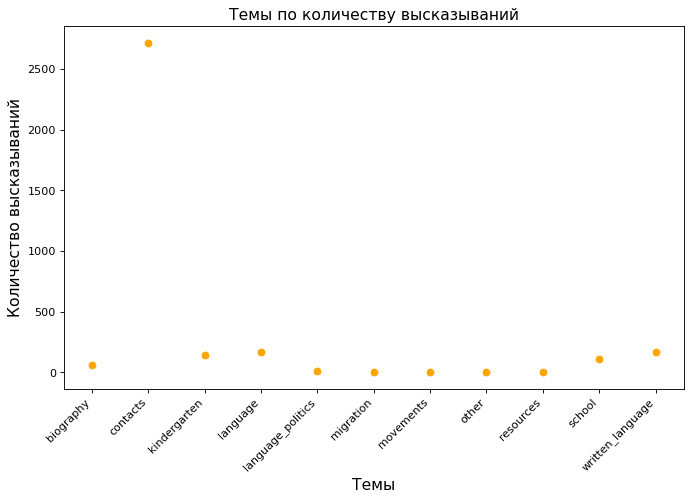

In [142]:
plt.figure(figsize=(10,6), dpi= 80)
x = np.array(popular_topics['topic'])
y = popular_topics['text'].values
plt.scatter(x, y, color = 'orange')
plt.title("Темы по количеству высказываний", size=14)
plt.xticks(rotation=45, horizontalalignment="right")
plt.xlabel("Темы", size=14)
plt.ylabel("Количество высказываний", size=14)
plt.show()

*(если можно было бы считать разметку надёжной)*

**Вывод:** чаще всего люди советовали интервьюерам новые контакты и обсуждали биографию своих знакомых. Все остальные результаты по темам я считаю незначимыми.

**2. Кто больше всех работал?**

In [173]:
working_int = df_predicted.groupby('speaker_id')['text'].count()
working_int = pd.DataFrame(working_int).reset_index()
best_int = working_int.sort_values('text', ascending=False).head(10)
best_int

,speaker_id,text
37,40,225
0,1,207
38,42,198
1,2,194
2,3,173
19,22,165
6,8,148
36,39,146
15,17,123
9,11,118


In [174]:
best = list(best_int['speaker_id'])
best

[40, 1, 42, 2, 3, 22, 8, 39, 17, 11]

In [175]:
id_search = """
SELECT real_name FROM speaker_names WHERE speaker_id LIKE ?
"""

In [188]:
best_names = []
for i in best:
    cur.execute(id_search, (i,))
    best_names.append(cur.fetchall()[0][0])
best_names

['Ольга Сухинина',
 'Катерина Ефремова',
 'Любовь Филиппова',
 'Анастасия Прохорова',
 'Алексей Рыжков',
 'Анна Елагина',
 'Ольга Ломуева',
 'Ольга Иванова',
 'Дарья Морозова',
 'Екатерина Козлова']

Text(0.5, 0, 'Имя')

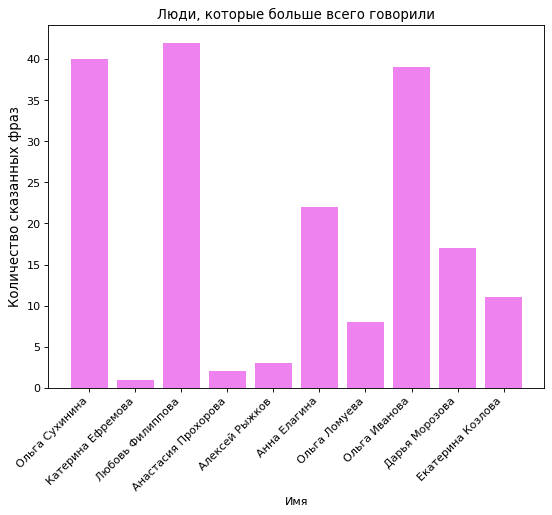

In [193]:
plt.figure(figsize=(8,6), dpi= 80)
plt.bar(
    x=best_names,
    height=best,
    color = 'violet'
)

plt.xticks(rotation=45, horizontalalignment="right")
plt.title("Люди, которые больше всего говорили", fontsize=12)
plt.ylabel("Количество сказанных фраз", fontsize=12)
plt.xlabel("Имя")

*(если можно было бы считать разметку надёжной)*

**Вывод:** кто-то говорил сильно больше остальных.

Кстати, всегда ли это интервьюеры?

In [196]:
role_search = """
SELECT speaker_role FROM speaker_names WHERE speaker_id LIKE ?
"""

In [198]:
roles = []
for i in best:
    cur.execute(role_search, (i,))
    roles.append(cur.fetchall()[0][0])
roles

['informant',
 'informant',
 'informant',
 'informant',
 'interviewer',
 'interviewer',
 'informant',
 'informant',
 'interviewer',
 'interviewer']

In [200]:
x1 = roles.count('informant')
x1

6

In [201]:
x2 = roles.count('interviewer')
x2

4

<AxesSubplot:ylabel='speakers'>

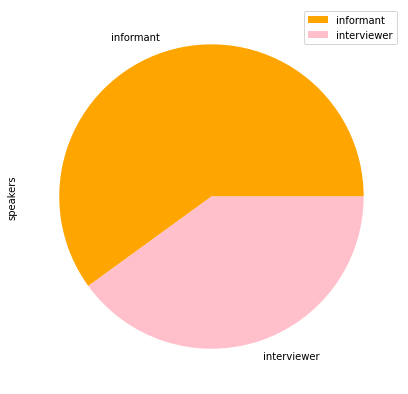

In [214]:
df_roles = pd.DataFrame({'speakers': [x1, x2]},
                  index=['informant', 'interviewer'])
df_roles.plot.pie(y='speakers', figsize=(7, 7), colors = ['orange', 'pink'])

**Вывод:** Информанты в распарсенных интервью действительно говорили больше! Потому что так и должно быть на небольшом количестве интервью. Интересно, что получится, если распарсить всё!

*Спасибо за внимание!*

**Планы и перспективы:**

- сделать парсер более умным, чтобы он отсылал на ручную проверку интервью, в которых есть ошибки в разметке, а не записывал ничего/не браковал интервью
- сделать multi-label классификацию
- в рамках post production данных экспедиции вместе с командой разметить много-много интервью по темам, чтобы модель работала лучше
- обработать все-все интервью кодом
- подумать, возможно ли как-то с минимальными затратами энергии компьютера добавлять в базу ещё расшифровки
- сделать сайт с удобным интерфейсом, на котором искать по темам сможет кто угодно из состава экспедиции (но тут могут быть проблемы с защитой персональных данных)

*Он неидеальный, зато мой...*
(проект)